In [1]:
#importing the libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
#importing the csv file
train_df = pd.read_csv('train.csv')

# 1. Ensure the data is loaded properly

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Identify the structure of data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. Check the 6 Point Summary

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 Point to observe here:
    
    50% is the median.
    If mean and median are close to each other - normal distribution.
    Check for missing values for each column.
    Check the outlier - 3 SD away from mean.
    Check the min - max. 
    
    
    if mean > median -> right skewed
    if mean < median -> left skewed

# 4. Identification and Handling of missing values.

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


So, normally we can igore the emarked missing value by removing the rows. Since it is within the rage of 5% of the data. But for learning purpose lets try to fix the missing value.

Based of the fare we will try to get an idea of embarked station. 

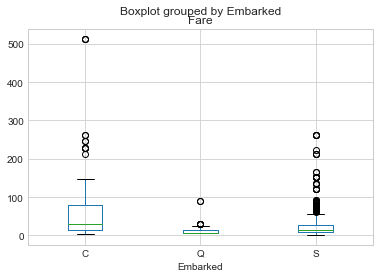

In [8]:
train_df.boxplot(column=['Fare'], by='Embarked')

We can notice that for Q and S fare 80 would be an outlier value. While for C it would be a value withing range. So, probably the emarked will be C for these two records.

In [9]:
train_df['Embarked'] = train_df['Embarked'].fillna('C')

In [10]:
train_df[train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Not even 50% of data is present for this column. So based on existing data we should not populate value for this column. So we are left with below options:
    1. Ignore the column.
    2. Create new category representing the null and populate it for missing value. This is applicable only for categorical data, if we does not want it to be removed.
    
    We are going to create a new category "Not Assigned" for "NaN".

In [11]:
 # Assigning new category 
    #train_df['Cabin'] = train_df['Cabin'].fillna('Not Assigned')

In [12]:
# Dropping the column
train_df.drop(['Cabin'], axis = 'columns', inplace= True)
train_df.shape

(891, 11)

In [13]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


There are 177 missing values for age. We can handle such cases by using central tendency measures.
We prefer mean when it is not very affected by outliers. Else we should go for median.
There are 2 ways to compute central tendency here:
    1. Generalised approach: Take the mean/median of all the rows for the column and populate the mean/median for missing values.
    2. Like case: We filter out the similar cases and take there mean/median to get the value for misisng records.
        Ex: to get the value of missing height of a man, take the mean/median of only those records where gender is male.

In [14]:
#using generalised approach to fill the NA with mean
train_df['Age'] = train_df['Age'].fillna(np.mean(train_df['Age']))

# 5. Identification and Handling of outliers

Identification:
    1. Box Plot : 1.5 IQR approach
        IQR = 75% - 25%
        if there is any value outside the range of -1.5 IQR to +1.5 IQR , consider it as an outlier
    2. Z Score: 
        if the value is not present within the range of 3 standard deviation away from mean, it is an outlier.
        assumption is 99.7% of data should be present in 3 SD away from mean.
        

Percentile capping: this is one of the way of handling the outlier.In this approach we replace the outlier with nearest possible acceptable value(from extreme corner of the distribution) which is at the fringes of the box plot.


In [15]:
#detect outlier using IQR
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    return multiple_outliers


print(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]))
train_df.shape
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop = True)
train_df.shape
    

[7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


(866, 11)

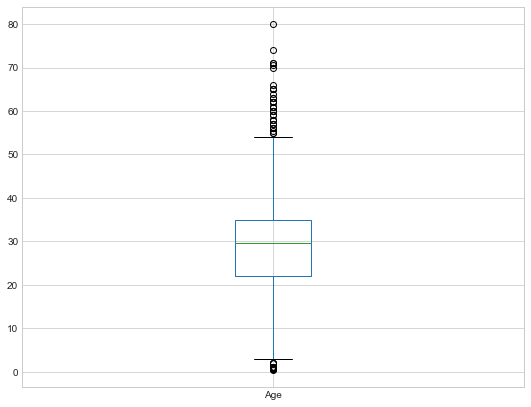

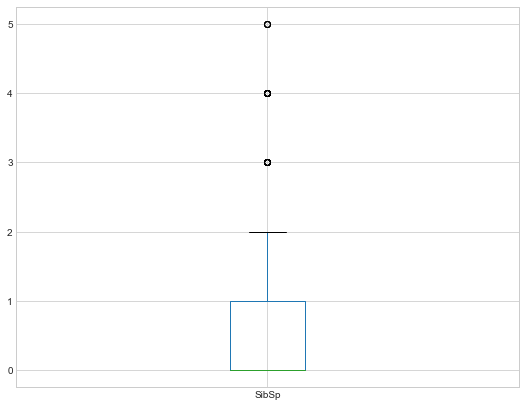

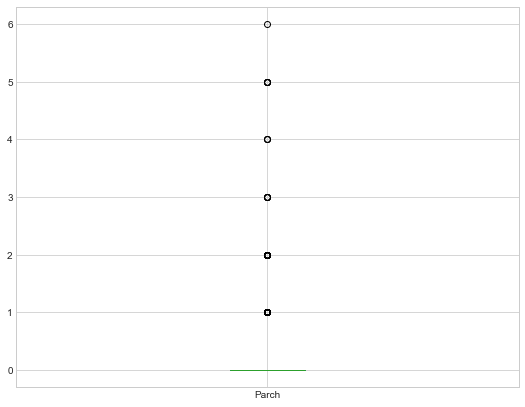

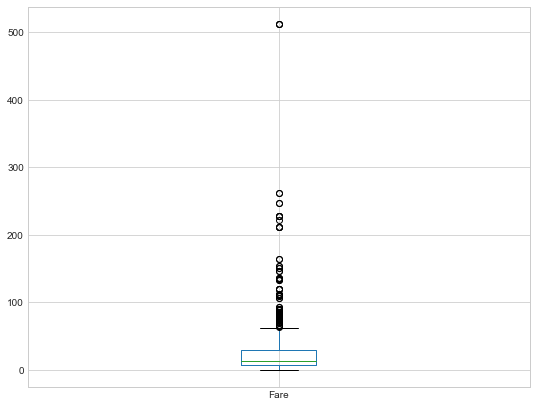

In [16]:
l = ["Age","SibSp","Parch","Fare"]
for i in l:   
    plt.figure(figsize = (9,7))
    train_df.boxplot(column=[i])

# 6. Identification and Handling of duplicates

In [17]:
train_df[train_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [18]:
#Selecting the row which are not duplicate. It gives a boolean result.
train_df[-train_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
861,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
862,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
863,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
864,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In duplicate function we can find duplicate specific to certain set of columns. We can also specify to keep the 1st occurence. Go to the document for more details.

Now the basic sanity of dataframe is done. We will perfom below analysis:
    1. Univariate Analysis
    2. Bivariate Analysis
    3. Correlation Analysis

# 1. Univariate Analysis

We will do seperate analysis for categorical data and for quantitative data.
For categorical data we will plot bar chart. For quantitative data we will plot histogram chart.

In [19]:
def bar_plot(variable):
      
    # get feature 
    var = train_df[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(5,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

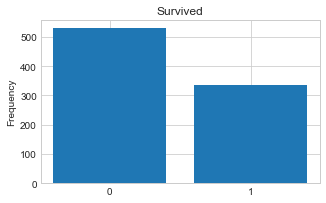

Survived:
0    530
1    336
Name: Survived, dtype: int64


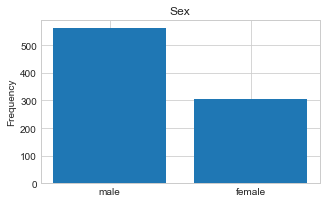

Sex:
male      562
female    304
Name: Sex, dtype: int64


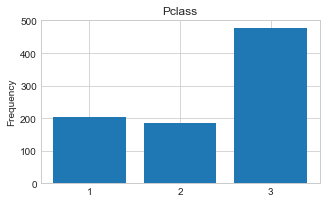

Pclass:
3    477
1    205
2    184
Name: Pclass, dtype: int64


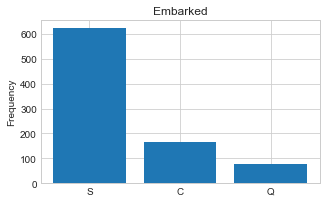

Embarked:
S    623
C    167
Q     76
Name: Embarked, dtype: int64


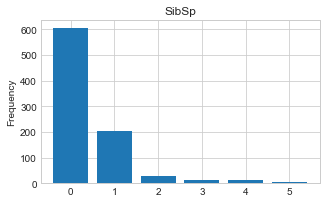

SibSp:
0    605
1    204
2     28
4     14
3     11
5      4
Name: SibSp, dtype: int64


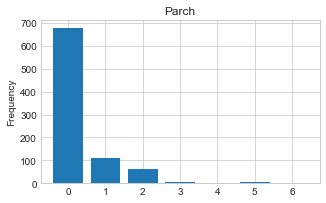

Parch:
0    678
1    110
2     64
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64


In [20]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

Observation:
    Parch: we can club 5,3,6,4 in one.
    Sibsp: we can club 2,4,3,5

In [21]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

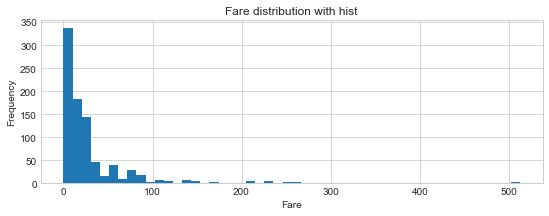

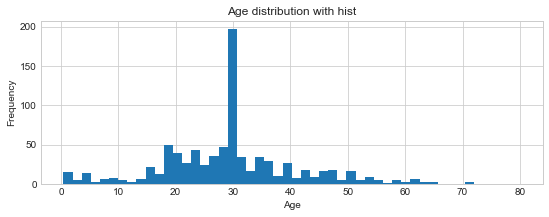

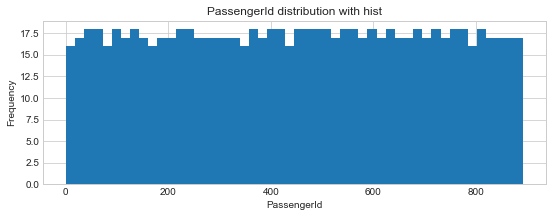

In [22]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

###### Observations:
    Fare: It is not a normal distribution. We can oberserve right skweness as median got shifted to the left of mean.
    Age: It is a kind of normal distribution. But we can oberve the kurtosis here.
Note:
    Skewness:
        2 types: Right skew and left skew.
        If median got shifted to the left of mean, its right skew.
        If median got shifted to the right of mean, its left skew.
    Kurtosis:
        is a measure of thickness around the nodal points.

# 2. Bivariate Analysis

Note: In bivariate analysis we have one dependent variable also know as response/outcome variable and one independent variable also know as prdictor/ attributes/Explanatory variable.

##### Survival Vs categorical variables

In [23]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.634146
1,2,0.472826
2,3,0.249476


In [24]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.753289
1,male,0.190391


In [25]:
# SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.539216
2,2,0.464286
0,0,0.343802
4,4,0.214286
3,3,0.181818
5,5,0.000000


In [26]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.578125
1,1,0.563636
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [27]:
# Embarked vs Survived
train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.556886
1,Q,0.394737
2,S,0.341894


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


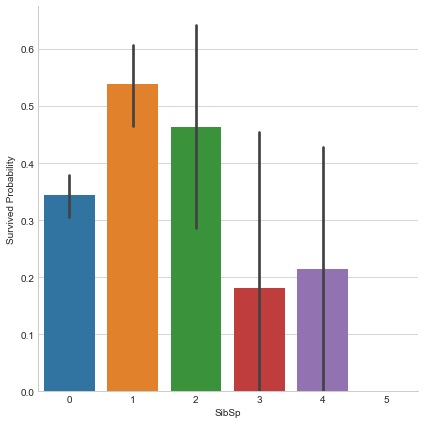

In [28]:
g = sns.factorplot(x='SibSp', y='Survived', data=train_df, kind='bar', size=6)
g.set_ylabels('Survived Probability')
plt.show()

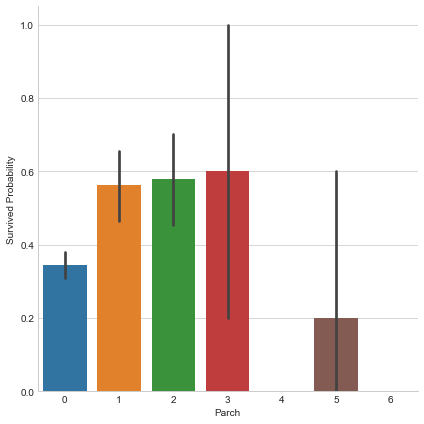

In [29]:
g = sns.factorplot(x='Parch', y='Survived', data=train_df, kind='bar', size=6)
g.set_ylabels('Survived Probability')
plt.show()

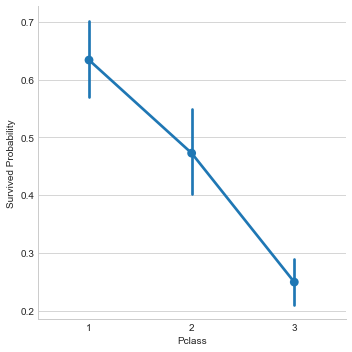

In [30]:
g = sns.factorplot(x='Pclass', y='Survived', data=train_df)
g.set_ylabels('Survived Probability')
plt.show()

##### Survival Vs Quantitaive Data Analysis

In [31]:
 ["Fare","Age","PassengerId"]

['Fare', 'Age', 'PassengerId']

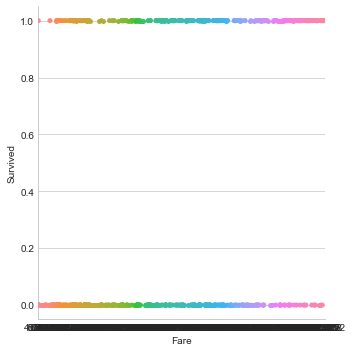

In [32]:
# Fare vs Survived
sns.catplot(x='Fare', y='Survived',data=train_df,kind='swarm')

# 3. Correlation Analysis

Correlation is applicable for numerical variable. It can be applied to categorical variable haveing numerical values condition that it should have variability. We visulaize it by scatter plot.
corr() : gives perason correlational coefficient

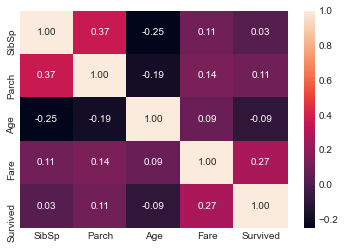

In [33]:
list1 = ['SibSp','Parch','Age','Fare','Survived']
sns.heatmap(train_df[list1].corr(), annot=True, fmt='.2f')
plt.show()